This notebook contains all the finalised plots and summary data used to describe the dataset in the manuscript. 

* [Plots in paper](#plots)
    
    1. [Call component measurements and derived data from individual call analysis](#indcall-rawdata-multipanel)
    1. [Median difference analysis of call parameters with time-interval separated data folds](#datafolds)
    1. [Whole audio analysis results : time-interval separated median differences](#wholeaudiotimesep)
    1. [Expected and observed dominant frequency ranges](#domfreqranges)



#### Date of notebook generation: 2020-10-19
#### Author: Thejasvi Beleyur, AFEG, MPI for Ornithology, Seewiesen

In [1]:
import glob
import os
import pathlib
import json 
import string
import matplotlib.pyplot as plt 
plt.rcParams['agg.path.chunksize'] = 10000
from matplotlib import gridspec
import numpy as np 
import pandas as pd
import seaborn as sns
import soundfile as sf

dB = lambda X: 20*np.log10(np.abs(X))

In [2]:
import sys 
sys.path.append('../individual_call_analysis/analysis/format_and_clean/')

In [3]:
import ind_call_format as icf

In [4]:
%matplotlib notebook

## Plots in paper <a id='plots'></a>

### Individual call comparisons:
This figure describes the median difference distribution of all the individual call characteristics measured. The median difference was compared between calls taken from single and multi bat clips. 

### Plotting the raw individual call data


In [5]:
ind_call = pd.read_csv('indcall_final.csv')

ind_call['groupsize'] = 'NA'
for i,each in ind_call.iterrows():
    if each['num_bats']>1:
        ind_call.loc[i,'groupsize'] = 'z_multi'
    else:
        ind_call.loc[i,'groupsize'] = 'a_single'


In [6]:
for each,fs in ind_call.groupby(['groupsize']):
    print(each)

a_single
z_multi


In [7]:
ind_call.columns

Index(['Unnamed: 0', 'Unnamed: 0.1', 'ifm_start', 'ifm_peak_freq_resolution',
       'ifm_terminal_frequency', 'ifm_duration', 'ifm_peak_frequency',
       'ifm_rms', 'ifm_stop', 'ifm_peak_amplitude', 'ifm_region_id',
       'cf_start', 'cf_peak_freq_resolution', 'cf_terminal_frequency',
       'cf_duration', 'cf_peak_frequency', 'cf_rms', 'cf_stop',
       'cf_peak_amplitude', 'cf_region_id', 'tfm_start',
       'tfm_peak_freq_resolution', 'tfm_terminal_frequency', 'tfm_duration',
       'tfm_peak_frequency', 'tfm_rms', 'tfm_stop', 'tfm_peak_amplitude',
       'tfm_region_id', 'audio_file', 'terminal_frequency_threshold',
       'video_annot_id', 'num_bats', '0', 'duration', 'peak_freq_resolution',
       'ifm-cf_dbratio', 'tfm-cf_dbratio', 'ifm-peak_db', 'tfm-peak_db',
       'tfm_dbrms', 'ifm_dbrms', 'cf_dbrms', 'cf-peak_db', 'ifm_rmsdb',
       'tfm_rmsdb', 'cf_rmsdb', 'ifm_bw', 'tfm_bw', 'annot_end_time',
       'annot_start_time', 'posix_end_time', 'posix_start_time', 'groupsize'

## Data Summaries<a id='datasummary'></a>

### Number of single and multi bat incidences annotated in the videos. 

In [8]:
# get the list of all video annotations made
annot_folder = '../whole_data_analysis/annotations/corrected_HBC_video_annotations_Aditya/'
vidannotation_files = glob.glob(annot_folder+'*.csv')
print(vidannotation_files)

['../whole_data_analysis/annotations/corrected_HBC_video_annotations_Aditya\\2018-08-16_21502300_Aditya.csv', '../whole_data_analysis/annotations/corrected_HBC_video_annotations_Aditya\\2018-08-16_2324_Aditya_corrected.csv', '../whole_data_analysis/annotations/corrected_HBC_video_annotations_Aditya\\2018-08-17_0-1am_Aditya.csv', '../whole_data_analysis/annotations/corrected_HBC_video_annotations_Aditya\\2018-08-17_1-2am_Aditya.csv', '../whole_data_analysis/annotations/corrected_HBC_video_annotations_Aditya\\2018-08-17_2-3am_Aditya.csv', '../whole_data_analysis/annotations/corrected_HBC_video_annotations_Aditya\\2018-08-17_3-4am_Aditya.csv', '../whole_data_analysis/annotations/corrected_HBC_video_annotations_Aditya\\2018-08-17_4-5am_Aditya.csv', '../whole_data_analysis/annotations/corrected_HBC_video_annotations_Aditya\\2018-08-17_5-6am_Aditya.csv', '../whole_data_analysis/annotations/corrected_HBC_video_annotations_Aditya\\2018-08-19_0120-0200_Aditya_corrected.csv', '../whole_data_anal

In [9]:
unread_files = []
annotations = 0
for each in vidannotation_files:
    print(each)

    try:
        df = pd.read_csv(each)
    except UnicodeDecodeError:
        df = pd.read_csv(each, encoding='cp1252')
    print(df.shape)
    annotations += int(df.shape[0])
#    else:
#        print(f'Could not read {os.path.split(each)[-1]}')
#        unread_files.append(each)

../whole_data_analysis/annotations/corrected_HBC_video_annotations_Aditya\2018-08-16_21502300_Aditya.csv
(111, 15)
../whole_data_analysis/annotations/corrected_HBC_video_annotations_Aditya\2018-08-16_2324_Aditya_corrected.csv
(289, 15)
../whole_data_analysis/annotations/corrected_HBC_video_annotations_Aditya\2018-08-17_0-1am_Aditya.csv
(83, 15)
../whole_data_analysis/annotations/corrected_HBC_video_annotations_Aditya\2018-08-17_1-2am_Aditya.csv
(120, 15)
../whole_data_analysis/annotations/corrected_HBC_video_annotations_Aditya\2018-08-17_2-3am_Aditya.csv
(197, 15)
../whole_data_analysis/annotations/corrected_HBC_video_annotations_Aditya\2018-08-17_3-4am_Aditya.csv
(222, 15)
../whole_data_analysis/annotations/corrected_HBC_video_annotations_Aditya\2018-08-17_4-5am_Aditya.csv
(356, 15)
../whole_data_analysis/annotations/corrected_HBC_video_annotations_Aditya\2018-08-17_5-6am_Aditya.csv
(207, 15)
../whole_data_analysis/annotations/corrected_HBC_video_annotations_Aditya\2018-08-19_0120-020

In [10]:

print(annotations)

2132


### % multi and % single 


### Number of final audio files availlable for analysis


In [11]:
matched_audio_files = list(pathlib.Path('../individual_call_analysis/hp_annotation_audio/').glob('**/*.WAV'))

In [12]:
len(matched_audio_files)

1181

In [13]:
durations = []
for each in matched_audio_files:
    durations.append(sf.info(each).duration)

In [14]:
plt.figure()
plt.violinplot(durations, quantiles=[0.025,0.975], showextrema=False)
plt.text(1.05,50, f'median,$\pm$95%ile: {np.median(durations)}, {np.percentile(durations, 2.5)}-{np.percentile(durations, 97.5)}')
plt.text(1.05,45, f'max-min: {np.min(durations)}-{np.max(durations)}')
plt.text(1.05,40, f'Total audio duration (s): {np.sum(durations)}')
plt.xlim(0.5,1.5)


<IPython.core.display.Javascript object>

(0.5, 1.5)

In [15]:
print(f'{np.sum(durations)/60.0} minutes in total are available for acoustic analysis')

36.97933333333334 minutes in total are available for acoustic analysis


### Number of single and multi bat calls in matched audio files

In [16]:
audiid= os.path.split(matched_audio_files[0])[-1][20:-7]

In [17]:
annot_folder

'../whole_data_analysis/annotations/corrected_HBC_video_annotations_Aditya/'

In [18]:
allannots = icf.read_all_annotation_files(annot_folder)

In [19]:
#icf.get_num_flying_bats([audiid], annot_folder)

### Number of analysed single + multi bat individual calls

In [20]:
ind_call = pd.read_csv('indcall_final.csv')
# Sample sizes:
single, multi = ind_call[ind_call['num_bats']==1], ind_call[ind_call['num_bats']>1]
print('Single call measurements %d \n and \n multi call measurements %d '%(single.shape[0], multi.shape[0]))
 

Single call measurements 177 
 and 
 multi call measurements 49 


In [21]:
total_n = ind_call.shape[0]
multi_n = multi.shape[0]
single_n = single.shape[0]

pd.DataFrame(data={'N':[total_n,single_n, multi_n, ],'calc':['total','single','multi']}).to_csv('indcall_sample_sizes.csv')

In [22]:
177+49

226

In [23]:
gpsize, n_samples = np.unique(ind_call['num_bats'], return_counts=True)

In [24]:
print(gpsize, n_samples)

[1 2 3 4] [177  40   7   2]


In [25]:
print(f'Total number of individual calls: {single.shape[0]+multi.shape[0]}')

Total number of individual calls: 226


### Range of tFM durations

In [26]:
ind_call

,Unnamed: 0,Unnamed: 0.1,ifm_start,ifm_peak_freq_resolution,ifm_terminal_frequency,ifm_duration,ifm_peak_frequency,ifm_rms,ifm_stop,ifm_peak_amplitude,...,ifm_rmsdb,tfm_rmsdb,cf_rmsdb,ifm_bw,tfm_bw,annot_end_time,annot_start_time,posix_end_time,posix_start_time,groupsize
0,0,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,-34.909538,-26.417414,NaN,18.196356,2018-08-16 22:24:26,2018-08-16 22:24:25,1.534451e+09,1.534451e+09,single
1,1,8,0.000100,2427.184466,99.264706,0.816,106617.647059,0.006330,0.000916,0.012207,...,-43.971904,-35.169376,-36.707915,9.386980,19.079493,2018-08-16 22:25:24,2018-08-16 22:25:21,1.534451e+09,1.534451e+09,single
2,2,9,0.000000,1028.806584,103.305785,1.936,105888.429752,0.017799,0.001936,0.050476,...,-34.992221,-36.434588,-16.518988,4.347649,4.928068,2018-08-16 22:25:47,2018-08-16 22:25:44,1.534451e+09,1.534451e+09,single
3,3,10,0.000736,1237.623762,92.039801,1.608,103855.721393,0.020311,0.002344,0.042267,...,-33.845518,-32.151383,-28.150393,13.361269,14.785024,2018-08-16 22:28:17,2018-08-16 22:28:16,1.534451e+09,1.534451e+09,single
4,4,11,0.000348,1173.708920,96.108491,1.696,102594.339623,0.007325,0.002044,0.019714,...,-42.703342,-42.676503,-33.825742,7.186083,7.822133,2018-08-16 22:28:47,2018-08-16 22:28:46,1.534451e+09,1.534451e+09,single
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
221,221,227,0.000108,5813.953488,85.294118,0.340,102941.176471,0.004141,0.000448,0.008911,...,-47.658144,-39.412485,-38.469716,17.158879,17.445823,2018-08-20 03:30:35,2018-08-20 03:30:34,1.534729e+09,1.534729e+09,single
222,222,228,0.000368,1077.586207,86.580087,1.848,89826.839827,0.017552,0.002216,0.036652,...,-35.113558,-28.187474,-29.569817,15.369026,18.414004,2018-08-20 03:35:44,2018-08-20 03:35:43,1.534729e+09,1.534729e+09,single
223,223,229,0.000452,1302.083333,93.342037,1.532,95953.002611,0.016604,0.001984,0.027985,...,-35.595860,-25.315148,-26.400488,12.595885,18.543854,2018-08-20 03:37:58,2018-08-20 03:37:58,1.534729e+09,1.534729e+09,single
224,224,230,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,-33.618774,-32.651990,NaN,17.393090,2018-08-20 03:38:01,2018-08-20 03:38:00,1.534729e+09,1.534729e+09,single


In [27]:
ind_call.columns

Index(['Unnamed: 0', 'Unnamed: 0.1', 'ifm_start', 'ifm_peak_freq_resolution',
       'ifm_terminal_frequency', 'ifm_duration', 'ifm_peak_frequency',
       'ifm_rms', 'ifm_stop', 'ifm_peak_amplitude', 'ifm_region_id',
       'cf_start', 'cf_peak_freq_resolution', 'cf_terminal_frequency',
       'cf_duration', 'cf_peak_frequency', 'cf_rms', 'cf_stop',
       'cf_peak_amplitude', 'cf_region_id', 'tfm_start',
       'tfm_peak_freq_resolution', 'tfm_terminal_frequency', 'tfm_duration',
       'tfm_peak_frequency', 'tfm_rms', 'tfm_stop', 'tfm_peak_amplitude',
       'tfm_region_id', 'audio_file', 'terminal_frequency_threshold',
       'video_annot_id', 'num_bats', '0', 'duration', 'peak_freq_resolution',
       'ifm-cf_dbratio', 'tfm-cf_dbratio', 'ifm-peak_db', 'tfm-peak_db',
       'tfm_dbrms', 'ifm_dbrms', 'cf_dbrms', 'cf-peak_db', 'ifm_rmsdb',
       'tfm_rmsdb', 'cf_rmsdb', 'ifm_bw', 'tfm_bw', 'annot_end_time',
       'annot_start_time', 'posix_end_time', 'posix_start_time', 'groupsize'

In [28]:
plt.figure()
ax = sns.boxplot(x="num_bats", y="tfm_duration", data=ind_call, showfliers = False)
ax = sns.swarmplot(x="num_bats", y="tfm_duration", data=ind_call, color=".15", size=2)
plt.ylabel('tFM duration, ms');plt.xlabel('');plt.xticks([]);
#plt.ylim(0,5);plt.yticks(np.arange(0,6))

<IPython.core.display.Javascript object>

In [29]:
np.percentile(ind_call['tfm_duration'].dropna(),[2.5,97.5])

array([0.7264, 3.3664])

In [30]:
multibat_indcall = ind_call.copy()
for col in ['ifm_rms','tfm_rms','cf_rms']:
    multibat_indcall[col+'db'] = dB(multibat_indcall[col])

multibat_indcall['ifm_bw'] = ind_call['cf_peak_frequency'] - ind_call['ifm_terminal_frequency']
multibat_indcall['tfm_bw'] = ind_call['cf_peak_frequency'] - ind_call['tfm_terminal_frequency']

# scale down the measurement units so they look pretty on the graphs
#for each in ['ifm_bw', 'tfm_bw', 'cf_peak_frequency', 'tfm_terminal_frequency','ifm_terminal_frequency']:
#    multibat_indcall[each] *= 0.001

#multibat_indcall['cf_duration'] *= 10**3
#multibat_indcall['tfm_duration'] *= 10**3
#multibat_indcall['ifm_duration'] *= 10**3

<IPython.core.display.Javascript object>


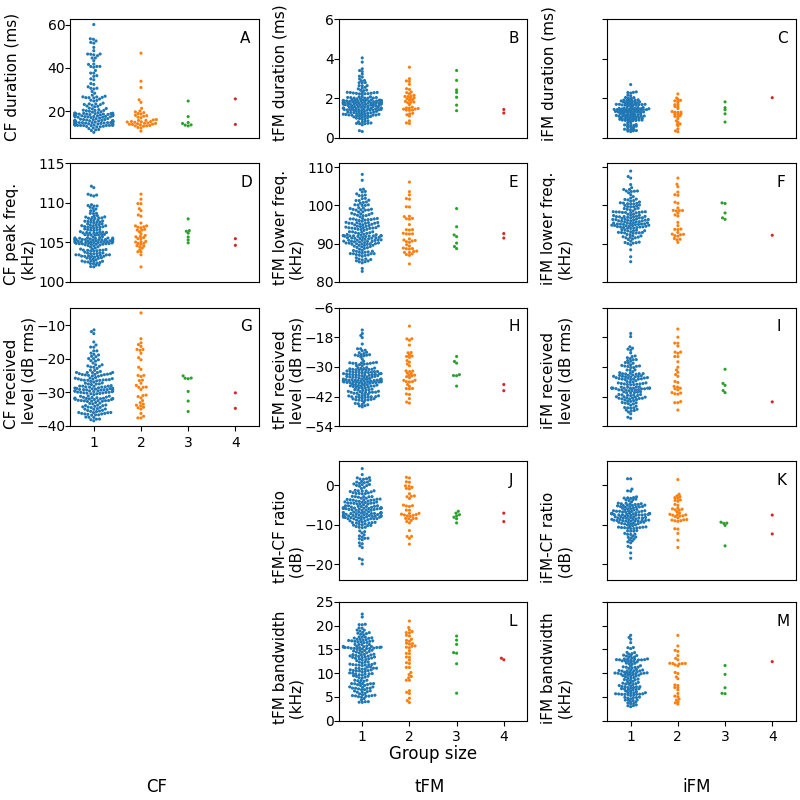

C:\Users\tbeleyur\anaconda3\envs\mhbc\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 24.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\tbeleyur\anaconda3\envs\mhbc\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 13.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\tbeleyur\anaconda3\envs\mhbc\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 5.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\tbeleyur\anaconda3\envs\mhbc\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 6.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\tbeleyur\anaconda3\envs\mhbc\lib\site-package

In [63]:
fig2 = plt.figure(figsize=(8,8),constrained_layout=True)
spec2 = gridspec.GridSpec(ncols=3, nrows=5, figure=fig2)
spec2.update(wspace=0.05,hspace=0.05) # set the spacing between axes. 

f2_ax1 = fig2.add_subplot(spec2[0, 0])
f2_ax2 = fig2.add_subplot(spec2[0, 1])
f2_ax3 = fig2.add_subplot(spec2[0, 2])

f2_ax5 = fig2.add_subplot(spec2[1, 0])
f2_ax6 = fig2.add_subplot(spec2[1, 1])
f2_ax7 = fig2.add_subplot(spec2[1, 2])

f2_ax9 = fig2.add_subplot(spec2[2, 0])
f2_ax10 = fig2.add_subplot(spec2[2, 1])
f2_ax11 = fig2.add_subplot(spec2[2, 2])

f2_ax14 = fig2.add_subplot(spec2[3, 1])
f2_ax15 = fig2.add_subplot(spec2[3, 2])


f2_ax18 = fig2.add_subplot(spec2[4,1])
f2_ax19 = fig2.add_subplot(spec2[4,2])

f2_ax20 = fig2.add_subplot(spec2[4,0])

point_size = 2.25

ylabx, ylaby = -0.35, 0.0


def make_subplotlabel(axesname, letter,subplotx=0.9, subploty=0.8):
    plt.text(subplotx, subploty, letter, transform=axesname.transAxes,
                             fontsize=11)



# Temporal
plt.sca(f2_ax1)
sns.swarmplot(y='cf_duration',x='num_bats', data=multibat_indcall,size=point_size)
plt.xlabel(''); plt.xticks([]);plt.ylabel('')
plt.text(ylabx, ylaby, 'CF duration (ms)', transform=f2_ax1.transAxes,
                             fontsize=11, rotation='vertical')
f2_ax1.tick_params(axis='y', which='major', pad=0.025)
make_subplotlabel(plt.gca(),'A')

plt.sca(f2_ax2)
sns.swarmplot(y='tfm_duration',x='num_bats', data=multibat_indcall,size=point_size)
plt.xlabel(''); plt.xticks([]);plt.ylabel('')
plt.ylim(0,6)
plt.text(ylabx, ylaby, 'tFM duration (ms)', transform=f2_ax2.transAxes,
                             fontsize=11, rotation='vertical')
f2_ax2.tick_params(axis='y', which='major', pad=0.025)
make_subplotlabel(plt.gca(),'B')


plt.sca(f2_ax3)

sns.swarmplot(y='ifm_duration',x='num_bats', data=multibat_indcall,size=point_size)
plt.xlabel(''); plt.xticks([]);plt.ylabel('')
plt.ylim(0,6)
plt.text(ylabx, ylaby, 'iFM duration (ms)', transform=f2_ax3.transAxes,
                             fontsize=11, rotation='vertical')
f2_ax3.tick_params(axis='y', which='major', pad=0.025)
plt.gca().axes.yaxis.set_ticklabels([])
make_subplotlabel(plt.gca(),'C')


# Spectral
plt.sca(f2_ax5)
sns.swarmplot(y='cf_peak_frequency',x='num_bats', data=multibat_indcall,size=point_size)
plt.xlabel(''); plt.xticks([]);plt.ylabel('')
plt.text(ylabx, ylaby, 'CF peak freq.\n (kHz)', transform=f2_ax5.transAxes,
                             fontsize=11, rotation='vertical')
plt.yticks(np.arange(100,120,5))
f2_ax5.tick_params(axis='y', which='major', pad=0.025)
make_subplotlabel(plt.gca(),'D')


plt.sca(f2_ax6)
sns.swarmplot(y='tfm_terminal_frequency',x='num_bats', data=multibat_indcall,size=point_size)
plt.xlabel(''); plt.xticks([]);plt.ylabel('')
plt.text(ylabx, ylaby, 'tFM lower freq.\n (kHz)', transform=f2_ax6.transAxes,
                             fontsize=11, rotation='vertical')
plt.ylim(80,111); plt.yticks(np.arange(80,120,10))
f2_ax6.tick_params(axis='y', which='major', pad=0.025)
make_subplotlabel(plt.gca(),'E')


plt.sca(f2_ax7)
sns.swarmplot(y='ifm_terminal_frequency',x='num_bats', data=multibat_indcall,size=point_size)
plt.xlabel(''); plt.xticks([]);plt.ylabel('')
plt.text(ylabx, ylaby, 'iFM lower freq.\n (kHz)', transform=f2_ax7.transAxes,
                             fontsize=11, rotation='vertical')
plt.ylim(80,111);plt.yticks(np.arange(80,120,10))
f2_ax7.tick_params(axis='y', which='major', pad=0.025)
f2_ax7.axes.yaxis.set_ticklabels([])
make_subplotlabel(plt.gca(),'F')

# Received level

plt.sca(f2_ax9)
sns.swarmplot(y='cf_rmsdb',x='num_bats', data=multibat_indcall,size=point_size)
plt.xlabel('');plt.ylabel('')
plt.text(ylabx, ylaby, 'CF received\n level (dB rms)', transform=f2_ax9.transAxes,
                             fontsize=11, rotation='vertical')
f2_ax9.tick_params(axis='y', which='major', pad=0.025)
make_subplotlabel(plt.gca(),'G')


plt.sca(f2_ax10)
sns.swarmplot(y='tfm_rmsdb',x='num_bats', data=multibat_indcall,size=point_size)
plt.xlabel(''); plt.xticks([]);plt.ylabel('')
plt.ylim(-54,-10);plt.yticks(np.arange(-54,0,12))
plt.text(ylabx, ylaby, 'tFM received\n level (dB rms)', transform=f2_ax10.transAxes,
                             fontsize=11, rotation='vertical')
f2_ax10.tick_params(axis='y', which='major', pad=0.025)
make_subplotlabel(plt.gca(),'H')


plt.sca(f2_ax11)
sns.swarmplot(y='ifm_rmsdb',x='num_bats', data=multibat_indcall,size=point_size)
plt.xlabel(''); plt.xticks([]);plt.ylabel('')
plt.ylim(-54,-10);plt.ylabel('');plt.yticks(np.arange(-54,0,12))
plt.text(ylabx, ylaby, 'iFM received\n level (dB rms)', transform=f2_ax11.transAxes,
                             fontsize=11, rotation='vertical')
f2_ax11.axes.yaxis.set_ticklabels([])
f2_ax11.tick_params(axis='y', which='major', pad=0.025)
make_subplotlabel(plt.gca(),'I')


# derived parameters
plt.sca(f2_ax14)
sns.swarmplot(y='tfm-cf_dbratio',x='num_bats', data=multibat_indcall,size=point_size)
plt.xlabel(''); plt.xticks([]);plt.ylabel('')
plt.ylim(-24,6)
plt.text(ylabx, ylaby, 'tFM-CF ratio\n (dB)', transform=f2_ax14.transAxes,
                             fontsize=11, rotation='vertical')
f2_ax14.tick_params(axis='y', which='major', pad=0.025)
make_subplotlabel(plt.gca(),'J')


plt.sca(f2_ax15)
sns.swarmplot(y='ifm-cf_dbratio',x='num_bats', data=multibat_indcall,size=point_size)
plt.xlabel(''); plt.xticks([]);plt.ylabel('')
plt.ylim(-24,6)
plt.text(ylabx, ylaby, 'iFM-CF ratio\n (dB)', transform=f2_ax15.transAxes,
                             fontsize=11, rotation='vertical')
f2_ax15.tick_params(axis='y', which='major', pad=0.025)
plt.gca().axes.yaxis.set_ticklabels([])
make_subplotlabel(plt.gca(),'K')


callpart_labelx, callpart_labely = 0.4, -0.6

plt.sca(f2_ax18)
sns.swarmplot(y='tfm_bw',x='num_bats', data=multibat_indcall,size=point_size)
plt.text(callpart_labelx, callpart_labely, 'tFM', transform=f2_ax18.transAxes, fontsize=12)
plt.xlabel('Group size', fontsize=12, labelpad=0.5)
plt.ylim(0,25);plt.ylabel('');plt.yticks(np.arange(0,30,5))

plt.text(ylabx, ylaby, 'tFM bandwidth\n (kHz)', transform=f2_ax18.transAxes,
                             fontsize=11, rotation='vertical')
f2_ax18.tick_params(axis='y', which='major', pad=0.025)
make_subplotlabel(plt.gca(),'L')


plt.sca(f2_ax19)
sns.swarmplot(y='ifm_bw',x='num_bats', data=multibat_indcall,size=point_size)
plt.ylim(0,25);plt.ylabel('');plt.yticks(np.arange(0,30,5))
plt.text(callpart_labelx, callpart_labely, 'iFM', transform=f2_ax19.transAxes, fontsize=12)
plt.xlabel('');
plt.text(ylabx, ylaby, 'iFM bandwidth\n (kHz)', transform=f2_ax19.transAxes,
                             fontsize=11, rotation='vertical')
f2_ax19.tick_params(axis='y', which='major', pad=0.025)
plt.gca().axes.yaxis.set_ticklabels([])
make_subplotlabel(plt.gca(),'M')


plt.sca(f2_ax20)
plt.axis('off')
plt.text(callpart_labelx, callpart_labely, 'CF', transform=f2_ax20.transAxes, fontsize=12)
plt.savefig('measurements_and_derivedparams_multipanel_w_groupsize.png')

<a id='indcall-rawdata-multipanel'></a>
**FIGURE CAPTION**: *Measurements (A-I) and derived parameters (J-M) of non-overlapped calls recorded across group sizes. The individual call analysis segmented each bat call into the iFM, CF, and tFM components and performed temporal (A-C), spectral (D-F) and intensity (G-I) measurements on each component. Most measured and derived call parameters are very similar across single and multiple bat group sizes (Se Figure XXXX for statistical comparisons). The only component which seems to show a slight difference is the CF duration (A), with single bat calls appearing to be much longer than calls in multi-bat groups. This apparent difference is however likely be a systematic bias of our call sampling protocol, which focussed on exclusively on finding non-overlapped  calls. Longer calls are more likely to be overlapped, and our protocol was inherently biased against long calls.*

In [32]:
groupsize_dict = {}
for each in [2,3,4]:
    groupsize_dict[each] = 'multi'
groupsize_dict[1] = 'single'

multibat_indcall['groupsize'] = multibat_indcall['num_bats'].apply(lambda X: groupsize_dict[X])

<IPython.core.display.Javascript object>


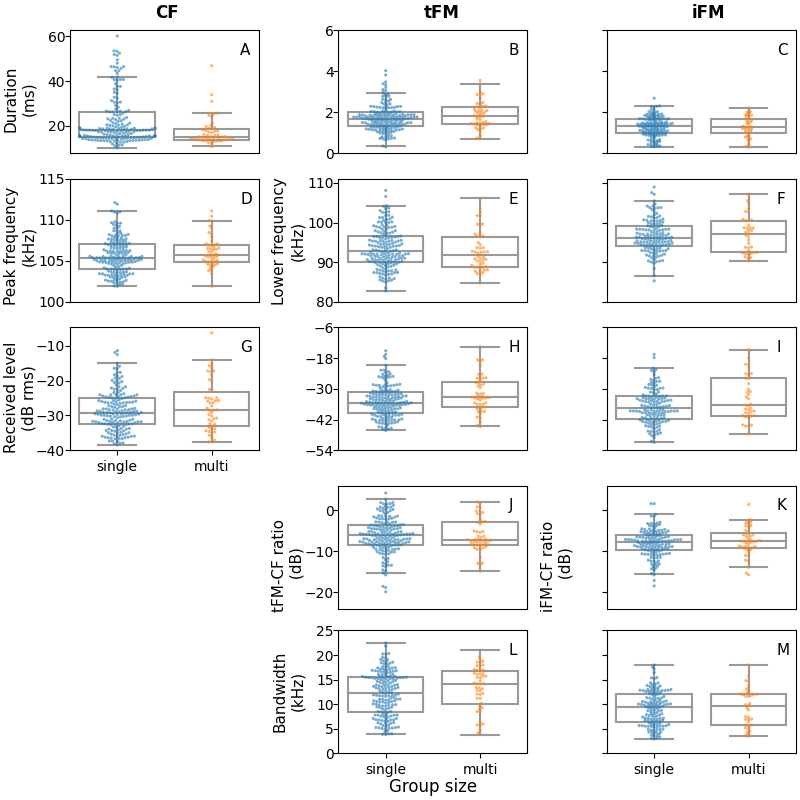

C:\Users\tbeleyur\anaconda3\envs\mhbc\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 5.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


In [80]:
fig2e = plt.figure(figsize=(8,8),constrained_layout=True)
spec2e = gridspec.GridSpec(ncols=3, nrows=5, figure=fig2e)
spec2e.update(wspace=0.05,hspace=0.05) # set the spacing between axes. 

f2e_ax1 = fig2e.add_subplot(spec2e[0, 0])
f2e_ax2 = fig2e.add_subplot(spec2e[0, 1])
f2e_ax3 = fig2e.add_subplot(spec2e[0, 2])

f2e_ax5 = fig2e.add_subplot(spec2e[1, 0])
f2e_ax6 = fig2e.add_subplot(spec2e[1, 1])
f2e_ax7 = fig2e.add_subplot(spec2e[1, 2])

f2e_ax9 = fig2e.add_subplot(spec2e[2, 0])
f2e_ax10 = fig2e.add_subplot(spec2e[2, 1])
f2e_ax11 = fig2e.add_subplot(spec2e[2, 2])

f2e_ax14 = fig2e.add_subplot(spec2e[3, 1])
f2e_ax15 = fig2e.add_subplot(spec2e[3, 2])


f2e_ax18 = fig2e.add_subplot(spec2e[4,1])
f2e_ax19 = fig2e.add_subplot(spec2e[4,2])

f2e_ax20 = fig2e.add_subplot(spec2e[4,0])

point_size = 2.25

ylabx, ylaby = -0.35, 0.0

newcallpart_labelx, newcallpart_labely = 0.45, 1.1

def make_subplotlabel(axesname, letter,subplotx=0.9, subploty=0.8):
    plt.text(subplotx, subploty, letter, transform=axesname.transAxes,
                             fontsize=11)

plt.sca(f2e_ax1)
plt.text(newcallpart_labelx, newcallpart_labely, 'CF', transform=plt.gca().transAxes, fontsize=12,weight='bold')
plt.sca(f2e_ax2)
plt.text(newcallpart_labelx, newcallpart_labely, 'tFM', transform=plt.gca().transAxes, fontsize=12,weight='bold')
plt.sca(f2e_ax3)
plt.text(newcallpart_labelx, newcallpart_labely, 'iFM', transform=plt.gca().transAxes, fontsize=12,weight='bold')

# Temporal
plt.sca(f2e_ax1)
sns.swarmplot(y='cf_duration',x='groupsize', data=multibat_indcall, order=['single','multi'],size=point_size,alpha=0.6)
sns.boxplot(y='cf_duration',x='groupsize', data=multibat_indcall, order=['single','multi'], color='white', showfliers=False)

plt.xlabel(''); plt.xticks([]);plt.ylabel('')
plt.text(ylabx, ylaby+0.2, 'Duration\n(ms)', transform=f2e_ax1.transAxes,
                             fontsize=11, rotation='vertical',multialignment='center')
f2e_ax1.tick_params(axis='y', which='major', pad=0.025)
make_subplotlabel(plt.gca(),'A')

plt.sca(f2e_ax2)
sns.swarmplot(y='tfm_duration',x='groupsize', data=multibat_indcall, order=['single','multi'],size=point_size, alpha=0.6)
sns.boxplot(y='tfm_duration',x='groupsize', data=multibat_indcall, order=['single','multi'], color='white', showfliers=False)

plt.xlabel(''); plt.xticks([]);plt.ylabel('')
plt.ylim(0,6)
plt.text(ylabx, ylaby, '', transform=f2e_ax2.transAxes,
                             fontsize=11, rotation='vertical')
f2e_ax2.tick_params(axis='y', which='major', pad=0.025)
make_subplotlabel(plt.gca(),'B')


plt.sca(f2e_ax3)

sns.swarmplot(y='ifm_duration',x='groupsize', data=multibat_indcall, order=['single','multi'],size=point_size, alpha=0.6)
sns.boxplot(y='ifm_duration',x='groupsize', data=multibat_indcall, order=['single','multi'], color='white', showfliers=False)
plt.xlabel(''); plt.xticks([]);plt.ylabel('')
plt.ylim(0,6)
plt.text(ylabx, ylaby, '', transform=f2e_ax3.transAxes,
                             fontsize=11, rotation='vertical')
f2e_ax3.axes.yaxis.set_ticklabels([])

f2e_ax3.tick_params(axis='y', which='major', pad=0.025)
make_subplotlabel(plt.gca(),'C')


# Spectral
plt.sca(f2e_ax5)
sns.swarmplot(y='cf_peak_frequency',x='groupsize', data=multibat_indcall, order=['single','multi'],size=point_size, alpha=0.6)
sns.boxplot(y='cf_peak_frequency',x='groupsize', data=multibat_indcall, order=['single','multi'], color='white', showfliers=False)
plt.xlabel(''); plt.xticks([]);plt.ylabel('')
plt.text(ylabx, ylaby, 'Peak frequency\n(kHz)', transform=f2e_ax5.transAxes,
                             fontsize=11, rotation='vertical',multialignment='center')
plt.yticks(np.arange(100,120,5))
f2e_ax5.tick_params(axis='y', which='major', pad=0.025)
make_subplotlabel(plt.gca(),'D')


plt.sca(f2e_ax6)
sns.swarmplot(y='tfm_terminal_frequency',x='groupsize', data=multibat_indcall, order=['single','multi'],size=point_size, alpha=0.6)
sns.boxplot(y='tfm_terminal_frequency',x='groupsize', data=multibat_indcall, order=['single','multi'], color='white', showfliers=False)

plt.xlabel(''); plt.xticks([]);plt.ylabel('')
plt.text(ylabx, ylaby, 'Lower frequency\n(kHz)', transform=f2e_ax6.transAxes,
                             fontsize=11, rotation='vertical', multialignment='center')
plt.ylim(80,111); plt.yticks(np.arange(80,120,10))
f2e_ax6.tick_params(axis='y', which='major', pad=0.025)
make_subplotlabel(plt.gca(),'E')


plt.sca(f2e_ax7)
sns.swarmplot(y='ifm_terminal_frequency',x='groupsize', data=multibat_indcall, order=['single','multi'],size=point_size, alpha=0.6)
sns.boxplot(y='ifm_terminal_frequency',x='groupsize', data=multibat_indcall, order=['single','multi'], color='white', showfliers=False)

plt.xlabel(''); plt.xticks([]);plt.ylabel('')
plt.text(ylabx, ylaby, '', transform=f2e_ax7.transAxes,
                             fontsize=11, rotation='vertical')
plt.ylim(80,111);plt.yticks(np.arange(80,120,10))
f2e_ax7.tick_params(axis='y', which='major', pad=0.025)
f2e_ax7.axes.yaxis.set_ticklabels([])
make_subplotlabel(plt.gca(),'F')

# Received level

plt.sca(f2e_ax9)
sns.swarmplot(y='cf_rmsdb',x='groupsize', data=multibat_indcall, order=['single','multi'],size=point_size, alpha=0.6)
sns.boxplot(y='cf_rmsdb',x='groupsize', data=multibat_indcall, order=['single','multi'], color='white', showfliers=False)

plt.xlabel('');plt.ylabel('')
plt.text(ylabx, ylaby, 'Received level\n(dB rms)', transform=f2e_ax9.transAxes,
                             fontsize=11, rotation='vertical', multialignment='center')
f2e_ax9.tick_params(axis='y', which='major', pad=0.025)
make_subplotlabel(plt.gca(),'G')


plt.sca(f2e_ax10)
sns.swarmplot(y='tfm_rmsdb',x='groupsize', data=multibat_indcall, order=['single','multi'],size=point_size, alpha=0.6)
sns.boxplot(y='tfm_rmsdb',x='groupsize', data=multibat_indcall, order=['single','multi'], color='white', showfliers=False)

plt.xlabel(''); plt.xticks([]);plt.ylabel('')
plt.ylim(-54,-10);plt.yticks(np.arange(-54,0,12))
plt.text(ylabx, ylaby, '', transform=f2e_ax10.transAxes,
                             fontsize=11, rotation='vertical')
f2e_ax10.tick_params(axis='y', which='major', pad=0.025)
make_subplotlabel(plt.gca(),'H')


plt.sca(f2e_ax11)
sns.swarmplot(y='ifm_rmsdb',x='groupsize', data=multibat_indcall, order=['single','multi'],size=point_size, alpha=0.6)
sns.boxplot(y='ifm_rmsdb',x='groupsize', data=multibat_indcall, order=['single','multi'], color='white', showfliers=False)

plt.xlabel(''); plt.xticks([]);plt.ylabel('')
plt.ylim(-54,-10);plt.ylabel('');plt.yticks(np.arange(-54,0,12))
plt.text(ylabx, ylaby, '', transform=f2e_ax11.transAxes,
                             fontsize=11, rotation='vertical')
f2e_ax11.axes.yaxis.set_ticklabels([])
f2e_ax11.tick_params(axis='y', which='major', pad=0.025)
make_subplotlabel(plt.gca(),'I')


# derived parameters
plt.sca(f2e_ax14)
sns.swarmplot(y='tfm-cf_dbratio',x='groupsize', data=multibat_indcall, order=['single','multi'],size=point_size, alpha=0.6)
sns.boxplot(y='tfm-cf_dbratio',x='groupsize', data=multibat_indcall, order=['single','multi'], color='white', showfliers=False)

plt.xlabel(''); plt.xticks([]);plt.ylabel('')
plt.ylim(-24,6)
plt.text(ylabx, ylaby, 'tFM-CF ratio\n (dB)', transform=f2e_ax14.transAxes,
                             fontsize=11, rotation='vertical',multialignment='center')
f2e_ax14.tick_params(axis='y', which='major', pad=0.025)
make_subplotlabel(plt.gca(),'J')


plt.sca(f2e_ax15)
sns.swarmplot(y='ifm-cf_dbratio',x='groupsize', data=multibat_indcall, order=['single','multi'],size=point_size, alpha=0.6)
sns.boxplot(y='ifm-cf_dbratio',x='groupsize', data=multibat_indcall, order=['single','multi'], color='white', showfliers=False)

plt.xlabel(''); plt.xticks([]);plt.ylabel('')
plt.ylim(-24,6)
plt.text(ylabx, ylaby, 'iFM-CF ratio\n (dB)', transform=f2e_ax15.transAxes,
                             fontsize=11, rotation='vertical',multialignment='center')
f2e_ax15.tick_params(axis='y', which='major', pad=0.025)
plt.gca().axes.yaxis.set_ticklabels([])
make_subplotlabel(plt.gca(),'K')


callpart_labelx, callpart_labely = 0.4, -0.6

plt.sca(f2e_ax18)
sns.swarmplot(y='tfm_bw',x='groupsize', data=multibat_indcall, order=['single','multi'],size=point_size, alpha=0.6)
sns.boxplot(y='tfm_bw',x='groupsize', data=multibat_indcall, order=['single','multi'], color='white', showfliers=False)

plt.xlabel('Group size', fontsize=12, labelpad=0.5)
plt.ylim(0,25);plt.ylabel('');plt.yticks(np.arange(0,30,5))

plt.text(ylabx, ylaby+0.2, 'Bandwidth\n(kHz)', transform=f2e_ax18.transAxes,
                             fontsize=11, rotation='vertical', multialignment='center')
f2e_ax18.tick_params(axis='y', which='major', pad=0.025)
make_subplotlabel(plt.gca(),'L')


plt.sca(f2e_ax19)
sns.swarmplot(y='ifm_bw',x='groupsize', data=multibat_indcall, order=['single','multi'],size=point_size, alpha=0.6)
sns.boxplot(y='ifm_bw',x='groupsize', data=multibat_indcall, order=['single','multi'], color='white', showfliers=False)

plt.ylim(0,25);plt.ylabel('');plt.yticks(np.arange(0,30,5))
plt.xlabel('');
plt.text(ylabx, ylaby, '', transform=f2e_ax19.transAxes,
                             fontsize=11, rotation='vertical')
f2e_ax19.tick_params(axis='y', which='major', pad=0.025)
plt.gca().axes.yaxis.set_ticklabels([])

make_subplotlabel(plt.gca(),'M')


plt.sca(f2e_ax20)
plt.axis('off')
plt.savefig('measurements_and_derivedparams_multipanel.png')

**FIGURE CAPTION**: *Difference in medians with bootstrapped 95 percentile confidence intervals for measured (A-I) and derived parameters (J-M). Temporal parameters (A-C): CF duration appears to be longer in single bat calls than in multi-bat calls. This increase in duration may however be an systematic bias of our call selection protocol, which only analysed non-overlapping calls. tFM (E) and iFM (F) durations do not show any difference. Spectral parameters (D-F): The measured spectral parameters show no difference between single and multi-bat calls. Intensity parameters (G-I): multi-bat calls appear to have more intense tFM components (H), however the observed difference is relatively low around 2 dB. CF (G) and iFM (I) components show no difference in received level. Derived parameters (J-M): Most of the derived parameters show no difference between single and multi bat calls. iFM-CF ratio shows a slight increase in multi-bat calls, but this is weak at around 1 dB.*

In [34]:
def get_median_difference_and_CI(df):
    median_deltamed = np.median(df['difference'])
    lower, upper = np.median(df['bca_low']), np.median(df['bca_high'])
    lower_error = abs(lower-median_deltamed)
    upper_error = abs(upper-median_deltamed)
    return median_deltamed, ([lower_error],[upper_error])

def make_median_and_CI_plot(df, msmt):
    '''
    '''
    msmts = df[df['measurement']==msmt]
    by_interval = msmts.groupby('interval')
    
        
    ax = plt.gca()
    for x, (interval, df) in enumerate(by_interval):
        median, limits = get_median_difference_and_CI(df)
        ax.errorbar(x, median, yerr=limits, fmt='o',capsize=3.5)
    plt.xlim(-0.5,x+0.5)
    plt.hlines(0,-0.5,x+0.5, linestyle='--')
    plt.xlabel(''); plt.ylabel('')
    plt.xticks([])

ylabx, ylaby = -.46, 0.0

In [35]:
alldata_indcall = pd.read_csv('alldata_indcall_ci.csv')
alldata_indcall['interval'] = 0

### Median difference analysis of call parameters with clustered and isolated data folds


In [36]:
fold_type = ['clustered', 'isolated']
cluster_results = []

for each in fold_type:
    df = pd.read_csv(each+'_subset_clusteringbased_bootci.csv')
    cluster_results.append(df)
cluster_results = pd.concat(cluster_results).reset_index(drop=True)

In [37]:
all_and_cluster = pd.concat([alldata_indcall, cluster_results]).reset_index(drop=True)

In [38]:
byint = all_and_cluster.groupby('interval')
for key, _ in byint:
    print(key)

0
clustered
isolated


In [39]:
fig511 = plt.figure(figsize=(8,8),constrained_layout=True)
gs511 = gridspec.GridSpec(ncols=3, nrows=5, figure=fig511)
#gs511.update(wspace=0.05,hspace=0.05)

f511_ax1 = fig511.add_subplot(gs511[0, 0])
f511_ax2 = fig511.add_subplot(gs511[0, 1])
f511_ax3 = fig511.add_subplot(gs511[0, 2])

f511_ax5 = fig511.add_subplot(gs511[1, 0])
f511_ax6 = fig511.add_subplot(gs511[1, 1])
f511_ax7 = fig511.add_subplot(gs511[1, 2])

f511_ax9 = fig511.add_subplot(gs511[2, 0])
f511_ax10 = fig511.add_subplot(gs511[2, 1])
f511_ax11 = fig511.add_subplot(gs511[2, 2])

f511_ax14 = fig511.add_subplot(gs511[3, 1])
f511_ax15 = fig511.add_subplot(gs511[3, 2])


f511_ax18 = fig511.add_subplot(gs511[4,1])
f511_ax19 = fig511.add_subplot(gs511[4,2])

def plot_xticks_and_labels():
    plt.xticks([0,1,2],['All','Clust-\nered','Isol-\nated'], fontsize=11)


# Temporal
plt.sca(f511_ax1)
plt.subplots_adjust(wspace=0.5,hspace=0.5)
make_median_and_CI_plot(all_and_cluster, 'cf_duration')
plt.text(ylabx, ylaby, '$\Delta$ CF duration\n(ms)', transform=f511_ax1.transAxes,
                             fontsize=11, rotation='vertical')
f511_ax1.tick_params(axis='y', which='major', pad=0.025)
make_subplotlabel(plt.gca(),'A');
plt.ylim(-10,6);plt.yticks([3,0,-3,-6,-9]);


def yticksfmtdurn():
    plt.yticks(np.arange(-1,1.5,0.5))
    plt.ylim(-1.3,1.8)

plt.sca(f511_ax2)
make_median_and_CI_plot(all_and_cluster, 'tfm_duration')
plt.xlabel(''); plt.xticks([]);plt.ylabel('')
plt.text(ylabx, ylaby, '$\Delta$ tFM duration\n  (ms)', transform=f511_ax2.transAxes,
                             fontsize=11, rotation='vertical')
f511_ax2.tick_params(axis='y', which='major', pad=0.025)
make_subplotlabel(plt.gca(),'B')
yticksfmtdurn()
#

plt.sca(f511_ax3)
make_median_and_CI_plot(all_and_cluster, 'ifm_duration')
plt.xlabel(''); plt.xticks([]);plt.ylabel('')
plt.text(ylabx, ylaby, '$\Delta$ iFM duration\n(ms)', transform=f511_ax3.transAxes,
                             fontsize=11, rotation='vertical')
f511_ax3.tick_params(axis='y', which='major', pad=0.025)
make_subplotlabel(plt.gca(),'C');
yticksfmtdurn()
f511_ax3.axes.yaxis.set_ticklabels([])



# Spectral
plt.sca(f511_ax5)
make_median_and_CI_plot(all_and_cluster,'cf_peak_frequency')
plt.xlabel(''); plt.xticks([]);plt.ylabel('')
plt.text(ylabx, ylaby, '$\Delta$ CF peak freq.\n(kHz)', transform=f511_ax5.transAxes,
                             fontsize=11, rotation='vertical')
f511_ax5.tick_params(axis='y', which='major', pad=0.025)
make_subplotlabel(plt.gca(),'D');
plt.ylim(-8,4);plt.yticks(np.arange(-6,6,3))


def yticksfmterm():
    
    plt.ylim(-12,6)
    plt.yticks(np.arange(-10,10,5))

plt.sca(f511_ax6)
make_median_and_CI_plot(all_and_cluster,'tfm_terminal_frequency')
plt.xlabel(''); plt.xticks([]);plt.ylabel('')
plt.text(ylabx, ylaby, '$\Delta$ tFM lower\nfreq. (kHz)', transform=f511_ax6.transAxes,
                             fontsize=11, rotation='vertical')
f511_ax6.tick_params(axis='y', which='major', pad=0.025)
make_subplotlabel(plt.gca(),'E');
yticksfmterm()



plt.sca(f511_ax7)
make_median_and_CI_plot(all_and_cluster,'ifm_terminal_frequency')
plt.xlabel(''); plt.xticks([]);plt.ylabel('')
plt.text(ylabx, ylaby, '$\Delta$ iFM lower\nfreq. (kHz)', transform=f511_ax7.transAxes,
                             fontsize=11, rotation='vertical')
f511_ax7.tick_params(axis='y', which='major', pad=0.025)
yticksfmterm()
f511_ax7.axes.yaxis.set_ticklabels([])
make_subplotlabel(plt.gca(),'F');

# Received level

plt.sca(f511_ax9)
make_median_and_CI_plot(all_and_cluster,'cf_dbrms')
plt.xlabel('');plt.ylabel('')
plt.text(ylabx, ylaby, '$\Delta$ CF received\n level (dB)', transform=f511_ax9.transAxes,
                             fontsize=11, rotation='vertical')
f511_ax9.tick_params(axis='y', which='major', pad=0.025);
make_subplotlabel(plt.gca(),'G');
plt.ylim(-11,8);plt.yticks([-9,-6,-3,0,3,6])
plot_xticks_and_labels();


def yticksfm_reclevel():
    plt.ylim(-13,13)
    plt.yticks(np.arange(-12,18,6))

plt.sca(f511_ax10)
make_median_and_CI_plot(all_and_cluster,'tfm_dbrms')
plt.xlabel(''); plt.xticks([]);plt.ylabel('')
plt.xticks([])
plt.text(ylabx, ylaby, '$\Delta$ tFM received\n level (dB)', transform=f511_ax10.transAxes,
                             fontsize=11, rotation='vertical')
f511_ax10.tick_params(axis='y', which='major', pad=0.025)
make_subplotlabel(plt.gca(),'H');
yticksfm_reclevel();


plt.sca(f511_ax11)
make_median_and_CI_plot(all_and_cluster,'ifm_dbrms')
plt.xlabel(''); plt.xticks([]);plt.ylabel('')
plt.xticks([])
plt.text(ylabx, ylaby, '$\Delta$ iFM received\n level (dB)', transform=f511_ax11.transAxes,
                             fontsize=11, rotation='vertical')

f511_ax11.tick_params(axis='y', which='major', pad=0.025)
make_subplotlabel(plt.gca(),'I');
yticksfm_reclevel();
f511_ax11.axes.yaxis.set_ticklabels([])

# derived parameters
def fmcf_yticks():
    plt.yticks([-3,0,3,6])
    plt.ylim(-4,7)

plt.sca(f511_ax14)
make_median_and_CI_plot(all_and_cluster, 'tfm-cf_dbratio')
plt.xlabel(''); plt.xticks([]);plt.ylabel('')
plt.xticks([]);fmcf_yticks()
plt.text(ylabx, ylaby, '$\Delta$ tFM-CF ratio\n   (dB)', transform=f511_ax14.transAxes,
                             fontsize=11, rotation='vertical')
f511_ax14.tick_params(axis='y', which='major', pad=0.025)
make_subplotlabel(plt.gca(),'J');



plt.sca(f511_ax15)
make_median_and_CI_plot(all_and_cluster, 'ifm-cf_dbratio')
plt.xlabel(''); plt.xticks([]);plt.ylabel('')
plt.text(ylabx, ylaby, '$\Delta$ iFM-CF ratio\n (dB)', transform=f511_ax15.transAxes,
                             fontsize=11, rotation='vertical')
f511_ax15.tick_params(axis='y', which='major', pad=0.025)
make_subplotlabel(plt.gca(),'K');fmcf_yticks()
plt.xticks([])
f511_ax15.axes.yaxis.set_ticklabels([])



plt.sca(f511_ax18)
make_median_and_CI_plot(all_and_cluster, 'tfm_bw')

plt.ylabel('');
plt.text(ylabx, ylaby, '$\Delta$ tFM\n bandwidth\n    (kHz)', transform=f511_ax18.transAxes,
                             fontsize=11, rotation='vertical')

f511_ax18.tick_params(axis='y', which='major', pad=0.025)
make_subplotlabel(plt.gca(),'L');plt.yticks(np.arange(-3,9,3))
plot_xticks_and_labels()


plt.sca(f511_ax19)
make_median_and_CI_plot(all_and_cluster, 'ifm_bw')
#plt.ylim(0,25);plt.ylabel('');plt.yticks(np.arange(0,30,5))
plt.xlabel('');
plt.text(ylabx, ylaby, '$\Delta$ iFM\n bandwidth\n  (kHz)', transform=f511_ax19.transAxes,
                             fontsize=11, rotation='vertical')
f511_ax19.tick_params(axis='y', which='major', pad=0.025)
;
plt.xticks([]);plt.yticks(np.arange(-3,9,3))
f511_ax19.axes.yaxis.set_ticklabels([])

make_subplotlabel(plt.gca(),'M');
plot_xticks_and_labels()




# labelling call parts 
callpart_labelx, callpart_labely = 0.4, 1.1
#tfm
plt.text(callpart_labelx, callpart_labely, 'tFM', transform=f511_ax2.transAxes, fontsize=12)
#cf
plt.text(callpart_labelx, callpart_labely, 'CF', transform=f511_ax1.transAxes, fontsize=12)
#ifm
plt.text(callpart_labelx, callpart_labely, 'iFM', transform=f511_ax3.transAxes, fontsize=12)


plt.text(-0.6,-0.68,
         'Annotations used for multi-single comparison', transform=f511_ax18.transAxes,
                             fontsize=12)
plt.savefig('figures/bootci_datafolds.png')

<IPython.core.display.Javascript object>

C:\Users\tbeleyur\anaconda3\envs\mhbc\lib\site-packages\ipykernel_launcher.py:30: UserWarning: This figure was using constrained_layout==True, but that is incompatible with subplots_adjust and or tight_layout: setting constrained_layout==False. 
C:\Users\tbeleyur\anaconda3\envs\mhbc\lib\site-packages\numpy\core\_asarray.py:83: UserWarning: Warning: converting a masked element to nan.
  return array(a, dtype, copy=False, order=order)


<a id='datafolds'></a>
### Median difference analysis of call parameters with time-interval separated data folds

In [40]:
raref = pd.read_csv('indcall_temprarefied_95pctile_intervals.csv')
raref

,Unnamed: 0,cf_duration,tfm_duration,ifm_duration,cf_peak_frequency,tfm_terminal_frequency,ifm_terminal_frequency,cf_dbrms,tfm_dbrms,ifm_dbrms,tfm-cf_dbratio,ifm-cf_dbratio,tfm_bw,ifm_bw,num_folds,interval
0,0,-3.2129,0.1720,-0.00600,0.266144,-1.750817,0.340558,-1.672192,-2.944338,-1.698845,-1.147143,0.050166,1.879389,0.078266,23,6
1,1,-3.1260,0.2040,0.02000,0.297770,-1.502009,0.620244,-1.512621,-2.597705,-1.244069,-1.030177,0.180823,2.075919,0.261439,23,6
2,2,-2.9380,0.2105,0.02400,0.341830,-1.270296,0.878327,-1.360965,-2.433405,-0.894782,-0.959439,0.277139,2.187236,0.990195,23,6
3,0,-3.4180,0.3040,0.01600,0.295593,-2.770296,0.102587,-1.603104,-2.510747,-2.786661,-1.039439,-0.910656,2.945379,-0.073128,105,60
4,1,-3.2300,0.3280,0.07600,0.372608,-2.419525,0.725050,-0.891903,-2.302562,-1.941127,-0.909254,-0.652864,3.006381,0.049342,105,60
5,2,-2.9980,0.3436,0.12200,0.446194,-2.336653,1.347513,-0.085345,-1.085760,-1.441277,-0.799264,-0.320227,3.346553,0.362169,105,60
6,0,-4.3680,0.3360,0.04200,0.782448,-3.489802,1.004674,-0.946722,-0.638801,0.720679,-1.049801,-0.575129,4.417170,-1.184095,168,300
7,1,-3.8920,0.3760,0.06400,1.093972,-3.407980,1.240079,0.197962,-0.512404,1.985383,-0.785698,-0.216617,5.103482,0.273056,168,300
8,2,-3.6640,0.4040,0.14495,1.442781,-3.285535,2.039270,1.044402,-0.402722,2.334188,-0.435177,0.206075,5.414170,1.530377,168,300
9,0,-4.5960,0.3080,-0.03600,0.525656,-3.331290,2.014534,0.828996,-4.526342,3.259762,-1.135583,0.207452,1.240948,-2.763517,187,600


<a id='intervaleffect'></a>
### The effect of interval-separated data folds



In [41]:
all_consistency_rates = pd.read_csv('interval_separation_consistency_rates.csv')

In [42]:
all_consistency_rates.head()

,Unnamed: 0,match_rate,measurement_name,inerval
0,0,0.000000,cf_dbrms,60
1,1,1.000000,cf_duration,60
2,2,0.990741,cf_peak_frequency,60
3,3,1.000000,ifm-cf_dbratio,60
4,4,1.000000,ifm_bw,60


In [43]:
by_interval = all_consistency_rates.groupby('inerval')

In [44]:
plt.figure(figsize=(8,8))
for subplotnum, interval in zip(np.arange(411,415),[60,900]):
    plt.subplot(subplotnum)
    sns.stripplot(y='match_rate',x='measurement_name',hue='inerval',data=by_interval.get_group(interval))
    plt.legend(loc=8)
    if not subplotnum == 414:
        plt.xticks([])
plt.subplot(414)
locs, labs = plt.xticks(rotation=60, fontsize=5)
spaced_labs = []
for each in labs:
    spaced_labs.append('\n'.join(each.get_text().split('_')))
plt.xticks(locs, spaced_labs, rotation=80, fontsize=5);
plt.xticks(fontsize=10);

<IPython.core.display.Javascript object>

**Figure caption**: *The percentage of data folds of each interval separation set that provide results matching those from the pooled data. Irrespective of interval separation the following parameters remain consistent:  ifm-cf dB ration, iFM bandwidth, iFM dBrms, iFM duration, iFM terminal frequency, tFM CF ratio. The effect of increasing interval separation is seen in CF duration, CF dBrms, tFM dB rms - which alter the trend from pooled data with increasing interval separation. Some parameters show unclear trends in their similarity to pooled data, eg. tFM duration, tFM terminal frequency.*

### Quantifying the difference estimates across interval folds: all unique folds


In [45]:
sep_bootci = []
for each in [60,900]:
    df = pd.read_csv(str(each)+'_seconds_interval_datafold_estimateddifferences.csv')
    df['interval'] = each
    sep_bootci.append(df)
sep_bootci = pd.concat(sep_bootci)

In [46]:
sep_bootci

,Unnamed: 0,ci_has_zero,ci_above_zero,ci_below_zero,perm_pvalue,difference,perm_pvalue_signif,bca_low,bca_high,measurement,fold_number,interval
0,0,False,False,True,0.0190,-3.468000,True,-5.312000,-1.032000,cf_duration,1,60
1,0,False,True,False,0.0204,0.316000,True,0.036000,0.496000,tfm_duration,1,60
2,0,True,False,False,0.5516,0.084000,False,-0.302000,0.448000,ifm_duration,1,60
3,0,True,False,False,NaN,0.013433,False,-3.342006,1.837522,cf_peak_frequency,1,60
4,0,False,False,True,0.0510,-2.594911,False,-4.542141,-0.354630,tfm_terminal_frequency,1,60
...,...,...,...,...,...,...,...,...,...,...,...,...
2504,0,True,False,False,0.3758,3.603601,False,-9.440133,10.858283,ifm_dbrms,193,900
2505,0,True,False,False,0.9538,0.112507,False,-4.672096,4.019030,tfm-cf_dbratio,193,900
2506,0,True,False,False,0.4318,1.234613,False,-0.862860,4.790986,ifm-cf_dbratio,193,900
2507,0,True,False,False,0.2246,2.554064,False,-4.123322,5.861419,tfm_bw,193,900


In [47]:
sep_bootci.sort_values('measurement', axis=0, ascending=True, inplace=True)

In [48]:
sep_bootci_byinterval = sep_bootci.groupby(['interval','measurement'])

In [49]:
df

,Unnamed: 0,ci_has_zero,ci_above_zero,ci_below_zero,perm_pvalue,difference,perm_pvalue_signif,bca_low,bca_high,measurement,fold_number,interval
0,0,True,False,False,0.2698,-2.808000,False,-7.864000,2.128000,cf_duration,1,900
1,0,True,False,False,0.1594,0.400000,False,-0.528000,1.184000,tfm_duration,1,900
2,0,True,False,False,0.8186,-0.036000,False,-0.522000,0.788000,ifm_duration,1,900
3,0,False,False,True,NaN,-4.346673,False,-7.599796,-1.615806,cf_peak_frequency,1,900
4,0,True,False,False,0.1472,-3.239779,False,-6.788530,1.878324,tfm_terminal_frequency,1,900
...,...,...,...,...,...,...,...,...,...,...,...,...
2504,0,True,False,False,0.3758,3.603601,False,-9.440133,10.858283,ifm_dbrms,193,900
2505,0,True,False,False,0.9538,0.112507,False,-4.672096,4.019030,tfm-cf_dbratio,193,900
2506,0,True,False,False,0.4318,1.234613,False,-0.862860,4.790986,ifm-cf_dbratio,193,900
2507,0,True,False,False,0.2246,2.554064,False,-4.123322,5.861419,tfm_bw,193,900


In [50]:
for each in ['bca_low','difference','bca_high']:
    print(np.percentile(df[each],[2.5,50,97.5]))

[-10.196       -5.24798937  -0.338     ]
[-4.34667314  0.098       3.60360069]
[-0.888       4.01903037 11.29033534]


In [51]:
indcall_alldata_w_folds = pd.concat((sep_bootci, alldata_indcall)).reset_index(drop=True)

In [52]:
fig61 = plt.figure(figsize=(8,8),constrained_layout=True)
gs61 = gridspec.GridSpec(ncols=3, nrows=5, figure=fig61)
#gs61.update(wspace=0.05,hspace=0.05)

f61_ax1 = fig61.add_subplot(gs61[0, 0])
f61_ax2 = fig61.add_subplot(gs61[0, 1])
f61_ax3 = fig61.add_subplot(gs61[0, 2])

f61_ax5 = fig61.add_subplot(gs61[1, 0])
f61_ax6 = fig61.add_subplot(gs61[1, 1])
f61_ax7 = fig61.add_subplot(gs61[1, 2])

f61_ax9 = fig61.add_subplot(gs61[2, 0])
f61_ax10 = fig61.add_subplot(gs61[2, 1])
f61_ax11 = fig61.add_subplot(gs61[2, 2])

f61_ax14 = fig61.add_subplot(gs61[3, 1])
f61_ax15 = fig61.add_subplot(gs61[3, 2])


f61_ax18 = fig61.add_subplot(gs61[4,1])
f61_ax19 = fig61.add_subplot(gs61[4,2])

def plot_xticks_and_labels():
    plt.xticks([0,1,2],['None',1,15], fontsize=11)


# Temporal
plt.sca(f61_ax1)
plt.subplots_adjust(wspace=0.5,hspace=0.5)
make_median_and_CI_plot(indcall_alldata_w_folds, 'cf_duration')
plt.text(ylabx, ylaby, '$\Delta$ CF duration\n(ms)', transform=f61_ax1.transAxes,
                             fontsize=11, rotation='vertical')
f61_ax1.tick_params(axis='y', which='major', pad=0.025)
make_subplotlabel(plt.gca(),'A');
plt.ylim(-10,3);plt.yticks([0,-3,-6,-9]);


def yticksfmtdurn():
    plt.yticks(np.arange(-0.9,1.5,0.3))
    plt.ylim(-0.5,1.2)

plt.sca(f61_ax2)
make_median_and_CI_plot(indcall_alldata_w_folds, 'tfm_duration')
plt.xlabel(''); plt.xticks([]);plt.ylabel('')
plt.text(ylabx, ylaby, '$\Delta$ tFM duration\n  (ms)', transform=f61_ax2.transAxes,
                             fontsize=11, rotation='vertical')
f61_ax2.tick_params(axis='y', which='major', pad=0.025)
make_subplotlabel(plt.gca(),'B')
yticksfmtdurn()
#

plt.sca(f61_ax3)
make_median_and_CI_plot(indcall_alldata_w_folds, 'ifm_duration')
plt.xlabel(''); plt.xticks([]);plt.ylabel('')
plt.text(ylabx, ylaby, '$\Delta$ iFM duration\n(ms)', transform=f61_ax3.transAxes,
                             fontsize=11, rotation='vertical')
f61_ax3.tick_params(axis='y', which='major', pad=0.025)
make_subplotlabel(plt.gca(),'C');
yticksfmtdurn()
f61_ax3.axes.yaxis.set_ticklabels([])



# Spectral
plt.sca(f61_ax5)
make_median_and_CI_plot(indcall_alldata_w_folds,'cf_peak_frequency')
plt.xlabel(''); plt.xticks([]);plt.ylabel('')
plt.text(ylabx, ylaby, '$\Delta$ CF peak freq.\n(kHz)', transform=f61_ax5.transAxes,
                             fontsize=11, rotation='vertical')
f61_ax5.tick_params(axis='y', which='major', pad=0.025)
make_subplotlabel(plt.gca(),'D');
plt.ylim(-9,9);plt.yticks(np.arange(-6,9,3))


def yticksfmterm():
    
    plt.ylim(-7,10)
    plt.yticks([-6,-3,0,3,6,9])

plt.sca(f61_ax6)
make_median_and_CI_plot(indcall_alldata_w_folds,'tfm_terminal_frequency')
plt.xlabel(''); plt.xticks([]);plt.ylabel('')
plt.text(ylabx, ylaby, '$\Delta$ tFM lower\nfreq. (kHz)', transform=f61_ax6.transAxes,
                             fontsize=11, rotation='vertical')
f61_ax6.tick_params(axis='y', which='major', pad=0.025)
make_subplotlabel(plt.gca(),'E');
yticksfmterm()



plt.sca(f61_ax7)
make_median_and_CI_plot(indcall_alldata_w_folds,'ifm_terminal_frequency')
plt.xlabel(''); plt.xticks([]);plt.ylabel('')
plt.text(ylabx, ylaby, '$\Delta$ iFM lower\nfreq. (kHz)', transform=f61_ax7.transAxes,
                             fontsize=11, rotation='vertical')
f61_ax7.tick_params(axis='y', which='major', pad=0.025)
yticksfmterm()
f61_ax7.axes.yaxis.set_ticklabels([])
make_subplotlabel(plt.gca(),'F');

# Received level

plt.sca(f61_ax9)
make_median_and_CI_plot(indcall_alldata_w_folds,'cf_dbrms')
plt.xlabel('');plt.ylabel('')
plt.text(ylabx, ylaby, '$\Delta$ CF received\n level (dB)', transform=f61_ax9.transAxes,
                             fontsize=11, rotation='vertical')
f61_ax9.tick_params(axis='y', which='major', pad=0.025);
make_subplotlabel(plt.gca(),'G');
plt.ylim(-11,8);plt.yticks([-9,-6,-3,0,3,6])
plot_xticks_and_labels();


def yticksfm_reclevel():
    plt.ylim(-13,13)
    plt.yticks(np.arange(-12,18,6))

plt.sca(f61_ax10)
make_median_and_CI_plot(indcall_alldata_w_folds,'tfm_dbrms')
plt.xlabel(''); plt.xticks([]);plt.ylabel('')
plt.xticks([])
plt.text(ylabx, ylaby, '$\Delta$ tFM received\n level (dB)', transform=f61_ax10.transAxes,
                             fontsize=11, rotation='vertical')
f61_ax10.tick_params(axis='y', which='major', pad=0.025)
make_subplotlabel(plt.gca(),'H');
yticksfm_reclevel();


plt.sca(f61_ax11)
make_median_and_CI_plot(indcall_alldata_w_folds,'ifm_dbrms')
plt.xlabel(''); plt.xticks([]);plt.ylabel('')
plt.xticks([])
plt.text(ylabx, ylaby, '$\Delta$ iFM received\n level (dB)', transform=f61_ax11.transAxes,
                             fontsize=11, rotation='vertical')

f61_ax11.tick_params(axis='y', which='major', pad=0.025)
make_subplotlabel(plt.gca(),'I');
yticksfm_reclevel();
f61_ax11.axes.yaxis.set_ticklabels([])

# derived parameters
def fmcf_yticks():
    plt.yticks([-6,-3,0,3,6])
    plt.ylim(-7,7)

plt.sca(f61_ax14)
make_median_and_CI_plot(indcall_alldata_w_folds, 'tfm-cf_dbratio')
plt.xlabel(''); plt.xticks([]);plt.ylabel('')
plt.xticks([]);fmcf_yticks()
plt.text(ylabx, ylaby, '$\Delta$ tFM-CF ratio\n   (dB)', transform=f61_ax14.transAxes,
                             fontsize=11, rotation='vertical')
f61_ax14.tick_params(axis='y', which='major', pad=0.025)
make_subplotlabel(plt.gca(),'J');



plt.sca(f61_ax15)
make_median_and_CI_plot(indcall_alldata_w_folds, 'ifm-cf_dbratio')
plt.xlabel(''); plt.xticks([]);plt.ylabel('')
plt.text(ylabx, ylaby, '$\Delta$ iFM-CF ratio\n (dB)', transform=f61_ax15.transAxes,
                             fontsize=11, rotation='vertical')
f61_ax15.tick_params(axis='y', which='major', pad=0.025)
make_subplotlabel(plt.gca(),'K');fmcf_yticks()
plt.xticks([])
f61_ax15.axes.yaxis.set_ticklabels([])



plt.sca(f61_ax18)
make_median_and_CI_plot(indcall_alldata_w_folds, 'tfm_bw')

plt.ylabel('');
plt.text(ylabx, ylaby, '$\Delta$ tFM\n bandwidth\n    (kHz)', transform=f61_ax18.transAxes,
                             fontsize=11, rotation='vertical')

f61_ax18.tick_params(axis='y', which='major', pad=0.025)
make_subplotlabel(plt.gca(),'L');plt.yticks(np.arange(-3,9,3))
plot_xticks_and_labels()


plt.sca(f61_ax19)
make_median_and_CI_plot(indcall_alldata_w_folds, 'ifm_bw')
#plt.ylim(0,25);plt.ylabel('');plt.yticks(np.arange(0,30,5))
plt.xlabel('');
plt.text(ylabx, ylaby, '$\Delta$ iFM\n bandwidth\n  (kHz)', transform=f61_ax19.transAxes,
                             fontsize=11, rotation='vertical')
f61_ax19.tick_params(axis='y', which='major', pad=0.025)
;
plt.xticks([]);plt.yticks(np.arange(-3,9,3))
f61_ax19.axes.yaxis.set_ticklabels([])

make_subplotlabel(plt.gca(),'M');
plot_xticks_and_labels()




# labelling call parts 
callpart_labelx, callpart_labely = 0.4, 1.1
#tfm
plt.text(callpart_labelx, callpart_labely, 'tFM', transform=f61_ax2.transAxes, fontsize=12)
#cf
plt.text(callpart_labelx, callpart_labely, 'CF', transform=f61_ax1.transAxes, fontsize=12)
#ifm
plt.text(callpart_labelx, callpart_labely, 'iFM', transform=f61_ax3.transAxes, fontsize=12)


plt.text(-0.6,-0.65,
         'Minimum inter-annotation separation (min)', transform=f61_ax18.transAxes,
                             fontsize=12)
plt.savefig('figures/bootci_datafolds.png')

<IPython.core.display.Javascript object>

C:\Users\tbeleyur\anaconda3\envs\mhbc\lib\site-packages\ipykernel_launcher.py:30: UserWarning: This figure was using constrained_layout==True, but that is incompatible with subplots_adjust and or tight_layout: setting constrained_layout==False. 


In [53]:
indcall_alldata_w_folds

,Unnamed: 0,ci_has_zero,ci_above_zero,ci_below_zero,perm_pvalue,difference,perm_pvalue_signif,bca_low,bca_high,measurement,fold_number,interval
0,0,True,False,False,0.4388,1.523212,False,-8.752364,6.911179,cf_dbrms,43.0,900
1,0,True,False,False,0.6506,0.942871,False,-8.261632,5.973566,cf_dbrms,42.0,900
2,0,True,False,False,0.4518,1.307478,False,-8.908297,6.307768,cf_dbrms,44.0,900
3,0,True,False,False,0.4706,1.307478,False,-9.012409,6.273083,cf_dbrms,45.0,900
4,0,True,False,False,0.4210,1.523212,False,-8.726589,6.455823,cf_dbrms,46.0,900
...,...,...,...,...,...,...,...,...,...,...,...,...
3921,0,True,False,False,0.3178,-1.663614,False,-4.173426,1.235931,ifm_dbrms,NaN,0
3922,0,True,False,False,0.1606,-1.075383,False,-1.846299,0.691911,tfm-cf_dbratio,NaN,0
3923,0,True,False,False,0.7528,0.246903,False,-0.781905,1.685167,ifm-cf_dbratio,NaN,0
3924,0,True,False,False,0.1206,1.826397,False,-0.121758,3.993855,tfm_bw,NaN,0


In [54]:
cfdbrms = indcall_alldata_w_folds.groupby('measurement').get_group('cf_dbrms')


In [55]:
cfdbrms

,Unnamed: 0,ci_has_zero,ci_above_zero,ci_below_zero,perm_pvalue,difference,perm_pvalue_signif,bca_low,bca_high,measurement,fold_number,interval
0,0,True,False,False,0.4388,1.523212,False,-8.752364,6.911179,cf_dbrms,43.0,900
1,0,True,False,False,0.6506,0.942871,False,-8.261632,5.973566,cf_dbrms,42.0,900
2,0,True,False,False,0.4518,1.307478,False,-8.908297,6.307768,cf_dbrms,44.0,900
3,0,True,False,False,0.4706,1.307478,False,-9.012409,6.273083,cf_dbrms,45.0,900
4,0,True,False,False,0.4210,1.523212,False,-8.726589,6.455823,cf_dbrms,46.0,900
...,...,...,...,...,...,...,...,...,...,...,...,...
297,0,True,False,False,0.4162,1.523212,False,-8.726589,6.325371,cf_dbrms,124.0,900
298,0,True,False,False,0.5006,1.193275,False,-8.760077,7.035035,cf_dbrms,113.0,900
299,0,True,False,False,0.4342,1.421681,False,-8.760077,6.273083,cf_dbrms,123.0,900
300,0,True,False,False,0.9566,0.147477,False,-3.288859,3.865992,cf_dbrms,14.0,60


In [56]:
ninh = cfdbrms.groupby('interval').get_group(900)
ninh

,Unnamed: 0,ci_has_zero,ci_above_zero,ci_below_zero,perm_pvalue,difference,perm_pvalue_signif,bca_low,bca_high,measurement,fold_number,interval
0,0,True,False,False,0.4388,1.523212,False,-8.752364,6.911179,cf_dbrms,43.0,900
1,0,True,False,False,0.6506,0.942871,False,-8.261632,5.973566,cf_dbrms,42.0,900
2,0,True,False,False,0.4518,1.307478,False,-8.908297,6.307768,cf_dbrms,44.0,900
3,0,True,False,False,0.4706,1.307478,False,-9.012409,6.273083,cf_dbrms,45.0,900
4,0,True,False,False,0.4210,1.523212,False,-8.726589,6.455823,cf_dbrms,46.0,900
...,...,...,...,...,...,...,...,...,...,...,...,...
294,0,True,False,False,0.5216,1.273989,False,-9.191009,6.388846,cf_dbrms,115.0,900
296,0,True,False,False,0.4334,1.523212,False,-8.760077,6.377659,cf_dbrms,105.0,900
297,0,True,False,False,0.4162,1.523212,False,-8.726589,6.325371,cf_dbrms,124.0,900
298,0,True,False,False,0.5006,1.193275,False,-8.760077,7.035035,cf_dbrms,113.0,900


In [57]:
def make_fold_wise_intervals_plot(df, msmt):
    msmt_df = df.groupby('measurement').get_group(msmt)
    by_intvl = msmt_df.groupby('interval')

    common_markersize = 0.75
    
    ax = plt.gca()

    for x, (interval, subdf) in enumerate(by_intvl):
        # get num_folds 
        num_folds = subdf.shape[0]
        
        if num_folds>1:
            within_plotx = np.linspace(x-0.35,x+0.35,num_folds)
        else:
            within_plotx = x
        
        for num,(i, row) in enumerate(subdf.iterrows()):
            yerr_lims = ([abs(row['bca_low']-row['difference'])],
                         [abs(row['bca_high']-row['difference'])]
                        )
            if num_folds>1:
                plt.plot(within_plotx[num],row['difference'],'rx',markersize=common_markersize)
                plt.plot(within_plotx[num],row['bca_low'],'ko',markersize=common_markersize)
                plt.plot(within_plotx[num],row['bca_high'],'ko',markersize=common_markersize)
            else:
                plt.plot(x,row['difference'],'rx',markersize=common_markersize)
                plt.plot(x,row['bca_low'],'ko',markersize=common_markersize)
                plt.plot(x,row['bca_high'],'ko',markersize=common_markersize)
        
            
    
def draw_zero_line_allfolds():
    plt.hlines(0,-0.1,2.5, linestyle='--', zorder=3, alpha=0.8)    
    

In [58]:
plt.figure()
make_fold_wise_intervals_plot(indcall_alldata_w_folds, 'tfm_terminal_frequency')
draw_zero_line_allfolds()



<IPython.core.display.Javascript object>

In [59]:

def make_subplotlabel(axesname, letter,subplotx=0.9, subploty=0.8):
    plt.text(subplotx, subploty, letter, transform=axesname.transAxes,
                             fontsize=11)

In [60]:
fig62 = plt.figure(figsize=(8,8),constrained_layout=True)
gs62 = gridspec.GridSpec(ncols=3, nrows=5, figure=fig62)
#gs62.update(wspace=0.05,hspace=0.05)

f62_ax1 = fig62.add_subplot(gs62[0, 0])
f62_ax2 = fig62.add_subplot(gs62[0, 1])
f62_ax3 = fig62.add_subplot(gs62[0, 2])

f62_ax5 = fig62.add_subplot(gs62[1, 0])
f62_ax6 = fig62.add_subplot(gs62[1, 1])
f62_ax7 = fig62.add_subplot(gs62[1, 2])

f62_ax9 = fig62.add_subplot(gs62[2, 0])
f62_ax10 = fig62.add_subplot(gs62[2, 1])
f62_ax11 = fig62.add_subplot(gs62[2, 2])

f62_ax14 = fig62.add_subplot(gs62[3, 1])
f62_ax15 = fig62.add_subplot(gs62[3, 2])


f62_ax18 = fig62.add_subplot(gs62[4,1])
f62_ax19 = fig62.add_subplot(gs62[4,2])

def plot_xticks_and_labels():
    plt.xticks([0,1,2],['None',1,15], fontsize=11)


# Temporal
plt.sca(f62_ax1)
plt.subplots_adjust(wspace=0.5,hspace=0.5)
make_fold_wise_intervals_plot(indcall_alldata_w_folds, 'cf_duration')
plt.text(ylabx, ylaby, '$\Delta$ CF duration\n(ms)', transform=f62_ax1.transAxes,
                             fontsize=11, rotation='vertical')
f62_ax1.tick_params(axis='y', which='major', pad=0.025)
make_subplotlabel(plt.gca(),'A',subplotx=0.1);
draw_zero_line_allfolds();
plt.ylim(-17,17);plt.yticks(np.arange(-15,20,5));


def yticksfmtdurn():
    plt.yticks(np.arange(-0.9,1.5,0.3))
    plt.ylim(-0.6,1.3)

plt.sca(f62_ax2)
make_fold_wise_intervals_plot(indcall_alldata_w_folds, 'tfm_duration')
plt.xlabel(''); plt.xticks([]);plt.ylabel('')
plt.text(ylabx, ylaby, '$\Delta$ tFM duration\n  (ms)', transform=f62_ax2.transAxes,
                             fontsize=11, rotation='vertical')
f62_ax2.tick_params(axis='y', which='major', pad=0.025)
make_subplotlabel(plt.gca(),'B',subplotx=0.1)
yticksfmtdurn()
draw_zero_line_allfolds();

#

plt.sca(f62_ax3)
make_fold_wise_intervals_plot(indcall_alldata_w_folds, 'ifm_duration')
plt.xlabel(''); plt.xticks([]);plt.ylabel('')
plt.text(ylabx, ylaby, '$\Delta$ iFM duration\n(ms)', transform=f62_ax3.transAxes,
                             fontsize=11, rotation='vertical')
f62_ax3.tick_params(axis='y', which='major', pad=0.025)
make_subplotlabel(plt.gca(),'C',subplotx=0.1);
yticksfmtdurn()
f62_ax3.axes.yaxis.set_ticklabels([])
draw_zero_line_allfolds();



# Spectral
plt.sca(f62_ax5)
make_fold_wise_intervals_plot(indcall_alldata_w_folds,'cf_peak_frequency')
plt.xlabel(''); plt.xticks([]);plt.ylabel('')
plt.text(ylabx, ylaby, '$\Delta$ CF peak freq.\n(kHz)', transform=f62_ax5.transAxes,
                             fontsize=11, rotation='vertical')
f62_ax5.tick_params(axis='y', which='major', pad=0.025)
make_subplotlabel(plt.gca(),'D',subplotx=0.1);
plt.ylim(-10,3.5);plt.yticks(np.arange(-9,6,3))
draw_zero_line_allfolds();


def yticksfmterm():
    
    plt.ylim(-8,11)
    plt.yticks([-6,-3,0,3,6,9])

plt.sca(f62_ax6)
make_fold_wise_intervals_plot(indcall_alldata_w_folds,'tfm_terminal_frequency')
plt.xlabel(''); plt.xticks([]);plt.ylabel('')
plt.text(ylabx, ylaby, '$\Delta$ tFM lower\nfreq. (kHz)', transform=f62_ax6.transAxes,
                             fontsize=11, rotation='vertical')
f62_ax6.tick_params(axis='y', which='major', pad=0.025)
make_subplotlabel(plt.gca(),'E',subplotx=0.1);
yticksfmterm()
draw_zero_line_allfolds();



plt.sca(f62_ax7)
make_fold_wise_intervals_plot(indcall_alldata_w_folds,'ifm_terminal_frequency')
plt.xlabel(''); plt.xticks([]);plt.ylabel('')
plt.text(ylabx, ylaby, '$\Delta$ iFM lower\nfreq. (kHz)', transform=f62_ax7.transAxes,
                             fontsize=11, rotation='vertical')
f62_ax7.tick_params(axis='y', which='major', pad=0.025)
yticksfmterm()
f62_ax7.axes.yaxis.set_ticklabels([])
make_subplotlabel(plt.gca(),'F',subplotx=0.1);
draw_zero_line_allfolds();

# Received level

plt.sca(f62_ax9)
make_fold_wise_intervals_plot(indcall_alldata_w_folds,'cf_dbrms')
plt.xlabel('');plt.ylabel('')
plt.text(ylabx, ylaby, '$\Delta$ CF received\n level (dB)', transform=f62_ax9.transAxes,
                             fontsize=11, rotation='vertical')
f62_ax9.tick_params(axis='y', which='major', pad=0.025);
make_subplotlabel(plt.gca(),'G',subplotx=0.1);
plt.ylim(-11,8);plt.yticks([-9,-6,-3,0,3,6])
plot_xticks_and_labels();
draw_zero_line_allfolds();


def yticksfm_reclevel():
    plt.ylim(-14,14)
    plt.yticks(np.arange(-12,18,6))

plt.sca(f62_ax10)
make_fold_wise_intervals_plot(indcall_alldata_w_folds,'tfm_dbrms')
plt.xlabel(''); plt.xticks([]);plt.ylabel('')
plt.xticks([])
plt.text(ylabx, ylaby, '$\Delta$ tFM received\n level (dB)', transform=f62_ax10.transAxes,
                             fontsize=11, rotation='vertical')
f62_ax10.tick_params(axis='y', which='major', pad=0.025)
make_subplotlabel(plt.gca(),'H',subplotx=0.1);
yticksfm_reclevel();
draw_zero_line_allfolds();


plt.sca(f62_ax11)
make_fold_wise_intervals_plot(indcall_alldata_w_folds,'ifm_dbrms')
plt.xlabel(''); plt.xticks([]);plt.ylabel('')
plt.xticks([])
plt.text(ylabx, ylaby, '$\Delta$ iFM received\n level (dB)', transform=f62_ax11.transAxes,
                             fontsize=11, rotation='vertical')

f62_ax11.tick_params(axis='y', which='major', pad=0.025)
make_subplotlabel(plt.gca(),'I',subplotx=0.1);
yticksfm_reclevel();
f62_ax11.axes.yaxis.set_ticklabels([])
draw_zero_line_allfolds();

# derived parameters
def fmcf_yticks():
    plt.yticks([-6,-3,0,3,6])
    plt.ylim(-7,7)

plt.sca(f62_ax14)
make_fold_wise_intervals_plot(indcall_alldata_w_folds, 'tfm-cf_dbratio')
plt.xlabel(''); plt.xticks([]);plt.ylabel('')
plt.xticks([]);fmcf_yticks()
plt.text(ylabx, ylaby, '$\Delta$ tFM-CF ratio\n   (dB)', transform=f62_ax14.transAxes,
                             fontsize=11, rotation='vertical')
f62_ax14.tick_params(axis='y', which='major', pad=0.025)
make_subplotlabel(plt.gca(),'J',subplotx=0.1);
draw_zero_line_allfolds();



plt.sca(f62_ax15)
make_fold_wise_intervals_plot(indcall_alldata_w_folds, 'ifm-cf_dbratio')
plt.xlabel(''); plt.xticks([]);plt.ylabel('')
plt.text(ylabx, ylaby, '$\Delta$ iFM-CF ratio\n (dB)', transform=f62_ax15.transAxes,
                             fontsize=11, rotation='vertical')
f62_ax15.tick_params(axis='y', which='major', pad=0.025)
make_subplotlabel(plt.gca(),'K',subplotx=0.1);fmcf_yticks()
plt.xticks([])
f62_ax15.axes.yaxis.set_ticklabels([])
draw_zero_line_allfolds();



plt.sca(f62_ax18)
make_fold_wise_intervals_plot(indcall_alldata_w_folds, 'tfm_bw')

plt.ylabel('');
plt.text(ylabx, ylaby, '$\Delta$ tFM\n bandwidth\n    (kHz)', transform=f62_ax18.transAxes,
                             fontsize=11, rotation='vertical')

f62_ax18.tick_params(axis='y', which='major', pad=0.025)
make_subplotlabel(plt.gca(),'L',subplotx=0.1);plt.yticks(np.arange(-3,9,3))
plot_xticks_and_labels()
draw_zero_line_allfolds();


plt.sca(f62_ax19)
make_fold_wise_intervals_plot(indcall_alldata_w_folds, 'ifm_bw')
#plt.ylim(0,25);plt.ylabel('');plt.yticks(np.arange(0,30,5))
plt.xlabel('');
plt.text(ylabx, ylaby, '$\Delta$ iFM\n bandwidth\n  (kHz)', transform=f62_ax19.transAxes,
                             fontsize=11, rotation='vertical')
f62_ax19.tick_params(axis='y', which='major', pad=0.025)
;
plt.xticks([]);plt.yticks(np.arange(-3,9,3))
f62_ax19.axes.yaxis.set_ticklabels([])

make_subplotlabel(plt.gca(),'M',subplotx=0.1);
plot_xticks_and_labels()
draw_zero_line_allfolds();




# labelling call parts 
callpart_labelx, callpart_labely = 0.4, 1.1
#tfm
plt.text(callpart_labelx, callpart_labely, 'tFM', transform=f62_ax2.transAxes, fontsize=12)
#cf
plt.text(callpart_labelx, callpart_labely, 'CF', transform=f62_ax1.transAxes, fontsize=12)
#ifm
plt.text(callpart_labelx, callpart_labely, 'iFM', transform=f62_ax3.transAxes, fontsize=12)


plt.text(-0.6,-0.65,
         'Minimum inter-annotation separation (min)', transform=f62_ax18.transAxes,
                             fontsize=12)
plt.savefig('figures/bootci_datafolds_foldlevel.png')

<IPython.core.display.Javascript object>

C:\Users\tbeleyur\anaconda3\envs\mhbc\lib\site-packages\ipykernel_launcher.py:30: UserWarning: This figure was using constrained_layout==True, but that is incompatible with subplots_adjust and or tight_layout: setting constrained_layout==False. 


### Whole audio analysis results : interval-separated median differences all

In [61]:
intervals = [60, 900]

# Dominant frequencies
allfolds_domfreq_multivirtmulti = []
for each in intervals:
    df = pd.read_csv(str(each)+'_seconds_interval_datafold_estimateddifferences_wholeaudio_multivirtmulti_domfreq_allfolds.csv')
    df['interval'] = each
    allfolds_domfreq_multivirtmulti.append(df)
allfolds_domfreq_multivirtmulti = pd.concat(allfolds_domfreq_multivirtmulti)

allfolds_domfreq_multisingle = []
for each in intervals:
    df = pd.read_csv(str(each)+'_seconds_interval_datafold_estimateddifferences_wholeaudio_domfreq_allfolds.csv')
    df['interval'] = each
    allfolds_domfreq_multisingle.append(df)
allfolds_domfreq_multisingle = pd.concat(allfolds_domfreq_multisingle)


#  dB rms
allfolds_dbrms_multivirtmulti = []
for each in intervals:
    df = pd.read_csv(str(each)+'_seconds_interval_datafold_estimateddifferences_wholeaudio_multivirtmulti_dbrms_allfolds.csv')
    df['interval'] = each
    allfolds_dbrms_multivirtmulti.append(df)
allfolds_dbrms_multivirtmulti = pd.concat(allfolds_dbrms_multivirtmulti)

allfolds_dbrms_multisingle = []
for each in intervals:
    df = pd.read_csv(str(each)+'_seconds_interval_datafold_estimateddifferences_wholeaudio_singlemulti_dbrms_allfolds.csv')
    df['interval'] = each
    allfolds_dbrms_multisingle.append(df)
allfolds_dbrms_multisingle = pd.concat(allfolds_dbrms_multisingle)

#  terminal freqs
'_seconds_interval_datafold_estimateddifferences_wholeaudio_singlemulti_termfreq_allfolds.csv'

allfolds_termfreq_multisingle = []
for each in intervals:
    df = pd.read_csv(str(each)+'_seconds_interval_datafold_estimateddifferences_wholeaudio_singlemulti_termfreq_allfolds.csv')
    df['interval'] = each
    allfolds_termfreq_multisingle.append(df)
allfolds_termfreq_multisingle = pd.concat(allfolds_termfreq_multisingle)


allfolds_termfreq_multivirtmulti = []
for each in intervals:
    df = pd.read_csv(str(each)+'_seconds_interval_datafold_estimateddifferences_wholeaudio_multivirtmulti_termfreq_allfolds.csv')
    df['interval'] = each
    allfolds_termfreq_multivirtmulti.append(df)
allfolds_termfreq_multivirtmulti = pd.concat(allfolds_termfreq_multivirtmulti)



In [62]:
fig7 = plt.figure(figsize=(8,8),constrained_layout=True)
gs7 = gridspec.GridSpec(ncols=2, nrows=3, figure=fig7)
gs7.update(wspace=0.04,hspace=0.05)

f7_ax0 = fig7.add_subplot(gs7[0, 0])
f7_ax1 = fig7.add_subplot(gs7[0, 1])
f7_ax2 = fig7.add_subplot(gs7[1, 0])
f7_ax3 = fig7.add_subplot(gs7[1, 1])
f7_ax4 = fig7.add_subplot(gs7[2, 0])
f7_ax5 = fig7.add_subplot(gs7[2, 1])

ylabx_wholeaudio, ylaby_wholeaudio = -0.25, 0.0

def dbrms_yticks():
    plt.yticks(np.arange(-9,12,3))
    plt.ylim(-10,10)
    draw_zero_line();

def domfreq_yticks():
    plt.yticks([-9,-6,-3,0,3,6])
    plt.ylim(-10,7)
    draw_zero_line();

def termfreq_yticks():
    plt.yticks(np.arange(-6,8,2))
    plt.ylim(-7,7)

# Dom freq range
plt.sca(f7_ax0)
plt.subplots_adjust(wspace=0.5,hspace=0.5)
make_median_and_CI_plot(allfolds_domfreq_multisingle, 'file_value_range')
plt.xlabel(''); plt.ylabel('')
plt.text(ylabx_wholeaudio,ylaby_wholeaudio,
                 '$\Delta$ Dominant freq. range \n(kHz)', transform=f7_ax0.transAxes,
                  fontsize=11, rotation='vertical')
f7_ax0.tick_params(axis='y', which='major', pad=0.025)
make_subplotlabel(plt.gca(),'A');
domfreq_yticks()

plt.text(0.2,1.1,
         '$Multiple - Single$', transform=f7_ax0.transAxes,
                             fontsize=12)

plt.sca(f7_ax1)
make_median_and_CI_plot(allfolds_dbrms_multisingle, 'random_value')
plt.xlabel(''); plt.xticks([]);plt.ylabel('')
plt.xticks([])
plt.text(ylabx_wholeaudio,ylaby_wholeaudio,
         '', transform=f7_ax1.transAxes,
                             fontsize=11, rotation='vertical')
f7_ax1.tick_params(axis='y', which='major', pad=0.025)
make_subplotlabel(plt.gca(),'B');
f7_ax1.axes.yaxis.set_ticklabels([]);
domfreq_yticks()

plt.text(0.2,1.1,
         '$Multiple-Virtual \:multi$', transform=f7_ax1.transAxes,
                             fontsize=12)

# dB rms - received level
plt.sca(f7_ax2)
plt.subplots_adjust(wspace=0.5,hspace=0.5)
make_median_and_CI_plot(allfolds_dbrms_multisingle, 'random_value')
plt.xlabel(''); plt.ylabel('')
plt.text(ylabx_wholeaudio,ylaby_wholeaudio,
                 '$\Delta$ Received level \n(dB rms)', transform=f7_ax2.transAxes,
                  fontsize=11, rotation='vertical')
f7_ax0.tick_params(axis='y', which='major', pad=0.025)
make_subplotlabel(plt.gca(),'C');domfreq_yticks();
dbrms_yticks()

plt.sca(f7_ax3)
make_median_and_CI_plot(allfolds_dbrms_multivirtmulti, 'random_value')
plt.xlabel(''); plt.xticks([]);plt.ylabel('')
plt.xticks([])
plt.text(ylabx_wholeaudio,ylaby_wholeaudio,
         '', transform=f7_ax1.transAxes,
                             fontsize=11, rotation='vertical')
f7_ax1.tick_params(axis='y', which='major', pad=0.025)
make_subplotlabel(plt.gca(),'D');domfreq_yticks()
f7_ax3.axes.yaxis.set_ticklabels([]);
dbrms_yticks()



# term freq.

plt.sca(f7_ax4)
plt.subplots_adjust(wspace=0.5,hspace=0.5)
make_median_and_CI_plot(allfolds_termfreq_multisingle, 'random_value')
plt.xlabel(''); plt.ylabel('')
plt.text(ylabx_wholeaudio,ylaby_wholeaudio,
                 '$\Delta$ FM terminal freq. \n(kHz)', transform=f7_ax4.transAxes,
                  fontsize=11, rotation='vertical')
f7_ax4.tick_params(axis='y', which='major', pad=0.025)
make_subplotlabel(plt.gca(),'E');draw_zero_line();termfreq_yticks();
plt.xticks([0,1],[1,15], fontsize=11)
plt.plot(1,-0.78,'r',marker='$X$',markersize=50)

plt.sca(f7_ax5)
make_median_and_CI_plot(allfolds_termfreq_multivirtmulti, 'random_value')
plt.xlabel(''); plt.xticks([]);plt.ylabel('')
plt.xticks([])
plt.text(ylabx_wholeaudio,ylaby_wholeaudio,
         '', transform=f7_ax5.transAxes,
                             fontsize=11, rotation='vertical')
f7_ax5.tick_params(axis='y', which='major', pad=0.025)
make_subplotlabel(plt.gca(),'F');
f7_ax5.axes.yaxis.set_ticklabels([]);draw_zero_line();termfreq_yticks();
plt.xticks([0,1],[1,15], fontsize=11)

plt.text(-0.6,-0.3,
         'Minimum inter-annotation separation (min)', transform=f7_ax5.transAxes,
                             fontsize=12)
plt.savefig('wholeaudio_deltamedian.png')


<IPython.core.display.Javascript object>

C:\Users\tbeleyur\anaconda3\envs\mhbc\lib\site-packages\ipykernel_launcher.py:30: UserWarning: This figure was using constrained_layout==True, but that is incompatible with subplots_adjust and or tight_layout: setting constrained_layout==False. 


NameError: name 'draw_zero_line' is not defined

In [ ]:
np.median(allfolds_domfreq_multisingle['difference'])

<a id='domfreqranges'></a>
### Expected and observed dominant frequency ranges

    

In [ ]:
domfreq_ranges = pd.read_csv('domfreqranges_calculated_simulated.csv')
domfreq_bysource = domfreq_ranges.groupby(['source'])
single_obssim = np.median(domfreq_bysource.get_group('sim_single')['domfreq_range'])-np.median(domfreq_bysource.get_group('observed')['domfreq_range'])
singlemulti_obssim = np.median(domfreq_bysource.get_group('sim_multi')['domfreq_range'])-np.median(domfreq_bysource.get_group('observed')['domfreq_range'])

In [ ]:
plt.figure()
a0 = plt.subplot(111)
sns.violinplot(x='source',y='domfreq_range',data=domfreq_ranges,order=['sim_single','observed','sim_multi'])
plt.text(0.15,5.1,f'$\Delta \:median = $ {single_obssim:.2f}',fontsize=11)
plt.text(1.15,8.1,f'$\Delta \:median = $ {singlemulti_obssim:.2f}',fontsize=11)

arrow_type = '|-|'
plt.annotate(s='', xy=(1.0,8), xytext=(2,8), arrowprops=dict(arrowstyle=arrow_type))
plt.annotate(s='', xy=(0,5), xytext=(1,5), arrowprops=dict(arrowstyle=arrow_type))
plt.xticks([0,1,2],['Simulated\nsingle bat', 'Observed\nsingle bat','Simulated\nbat pairs'], fontsize=11)
plt.ylabel('Dominant frequency range, kHz',fontsize=11);plt.yticks(fontsize=11)
plt.xlabel('')